In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [25]:
TRAIN_PATH = "../data/mnist_train.csv"
TEST_PATH  = "../data/mnist_test.csv"

train_data = np.loadtxt(TRAIN_PATH, delimiter=",", skiprows=1)
test_data  = np.loadtxt(TEST_PATH, delimiter=",", skiprows=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (60000, 785)
Test data shape: (10000, 785)


In [26]:
X_train = train_data[:, 1:]
y_train = train_data[:, 0]

X_test = test_data[:, 1:]
y_test = test_data[:, 0]

print(X_train.shape, y_train.shape)


(60000, 784) (60000,)


In [27]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [28]:
def one_hot_encode(labels, num_classes=10):
    encoded = np.zeros((labels.size, num_classes))
    encoded[np.arange(labels.size), labels.astype(int)] = 1
    return encoded

y_train_oh = one_hot_encode(y_train)
y_test_oh = one_hot_encode(y_test)


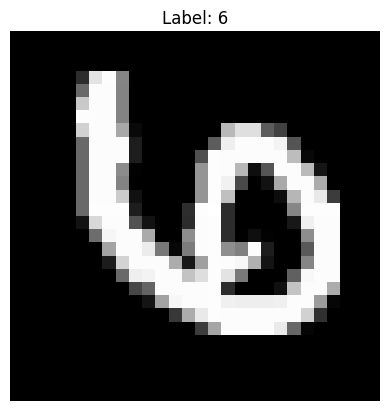

In [29]:
idx = np.random.randint(0, len(X_train))
plt.imshow(X_train[idx].reshape(28, 28), cmap="gray")
plt.title(f"Label: {int(y_train[idx])}")
plt.axis("off")
plt.show()


In [38]:
INPUT_SIZE = 784
HIDDEN_SIZE = 256
OUTPUT_SIZE = 10

LEARNING_RATE = 0.05
EPOCHS = 30

BATCH_SIZE = 128


In [39]:
np.random.seed(42)

W1 = np.random.randn(INPUT_SIZE, HIDDEN_SIZE) * 0.01
b1 = np.zeros((1, HIDDEN_SIZE))

W2 = np.random.randn(HIDDEN_SIZE, OUTPUT_SIZE) * 0.01
b2 = np.zeros((1, OUTPUT_SIZE))


In [40]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)


In [41]:
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    
    cache = (X, Z1, A1, Z2, A2)
    return A2, cache


In [42]:
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss


In [43]:
def compute_accuracy(y_true, y_pred):
    true_labels = np.argmax(y_true, axis=1)
    pred_labels = np.argmax(y_pred, axis=1)
    return np.mean(true_labels == pred_labels)


In [44]:
def backward_propagation(cache, y_true):
    X, Z1, A1, Z2, A2 = cache
    m = X.shape[0]
    
    dZ2 = A2 - y_true
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2


In [45]:
losses = []
accuracies = []

num_samples = X_train.shape[0]

for epoch in range(EPOCHS):
    permutation = np.random.permutation(num_samples)
    X_shuffled = X_train[permutation]
    y_shuffled = y_train_oh[permutation]

    for i in range(0, num_samples, BATCH_SIZE):
        X_batch = X_shuffled[i:i + BATCH_SIZE]
        y_batch = y_shuffled[i:i + BATCH_SIZE]

        y_pred, cache = forward_propagation(X_batch)

        dW1, db1, dW2, db2 = backward_propagation(cache, y_batch)

        W1 -= LEARNING_RATE * dW1
        b1 -= LEARNING_RATE * db1
        W2 -= LEARNING_RATE * dW2
        b2 -= LEARNING_RATE * db2

    # Evaluate after each epoch
    train_pred, _ = forward_propagation(X_train)
    loss = compute_loss(y_train_oh, train_pred)
    acc = compute_accuracy(y_train_oh, train_pred)

    losses.append(loss)
    accuracies.append(acc)

    print(f"Epoch {epoch+1}/{EPOCHS} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")


Epoch 1/30 | Loss: 0.4414 | Accuracy: 0.8808
Epoch 2/30 | Loss: 0.3404 | Accuracy: 0.9032
Epoch 3/30 | Loss: 0.3034 | Accuracy: 0.9137
Epoch 4/30 | Loss: 0.2755 | Accuracy: 0.9216
Epoch 5/30 | Loss: 0.2533 | Accuracy: 0.9286
Epoch 6/30 | Loss: 0.2299 | Accuracy: 0.9352
Epoch 7/30 | Loss: 0.2122 | Accuracy: 0.9407
Epoch 8/30 | Loss: 0.1962 | Accuracy: 0.9445
Epoch 9/30 | Loss: 0.1833 | Accuracy: 0.9489
Epoch 10/30 | Loss: 0.1700 | Accuracy: 0.9523
Epoch 11/30 | Loss: 0.1606 | Accuracy: 0.9547
Epoch 12/30 | Loss: 0.1503 | Accuracy: 0.9579
Epoch 13/30 | Loss: 0.1418 | Accuracy: 0.9599
Epoch 14/30 | Loss: 0.1345 | Accuracy: 0.9626
Epoch 15/30 | Loss: 0.1273 | Accuracy: 0.9647
Epoch 16/30 | Loss: 0.1205 | Accuracy: 0.9664
Epoch 17/30 | Loss: 0.1154 | Accuracy: 0.9680
Epoch 18/30 | Loss: 0.1097 | Accuracy: 0.9703
Epoch 19/30 | Loss: 0.1043 | Accuracy: 0.9720
Epoch 20/30 | Loss: 0.1001 | Accuracy: 0.9736
Epoch 21/30 | Loss: 0.0963 | Accuracy: 0.9739
Epoch 22/30 | Loss: 0.0926 | Accuracy: 0.97

In [46]:
test_pred, _ = forward_propagation(X_test)
test_accuracy = compute_accuracy(y_test_oh, test_pred)

print(f"Final Test Accuracy: {test_accuracy:.4f}")


Final Test Accuracy: 0.9733


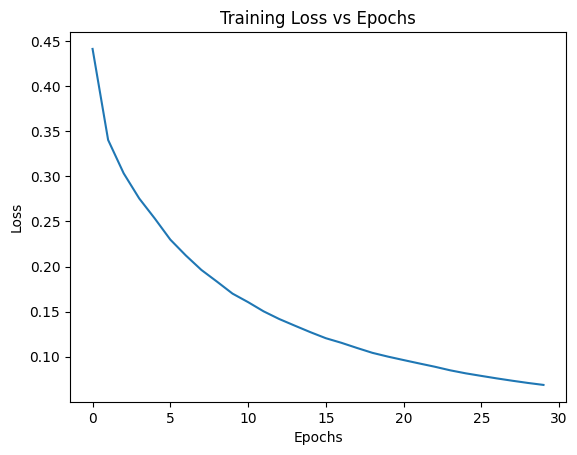

In [47]:
plt.figure()
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.savefig("../outputs/loss_curve.png")
plt.show()


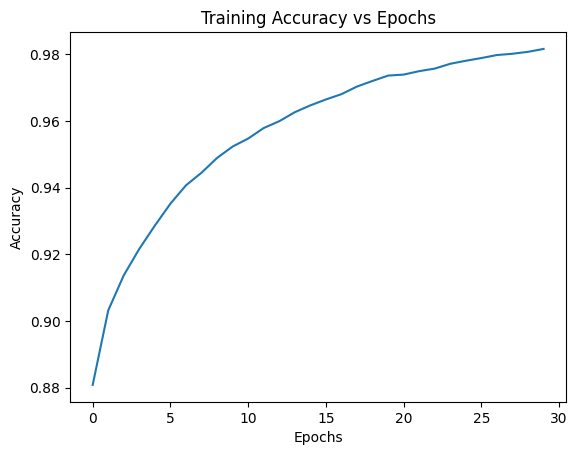

In [48]:
plt.figure()
plt.plot(accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Epochs")
plt.savefig("../outputs/accuracy_curve.png")
plt.show()


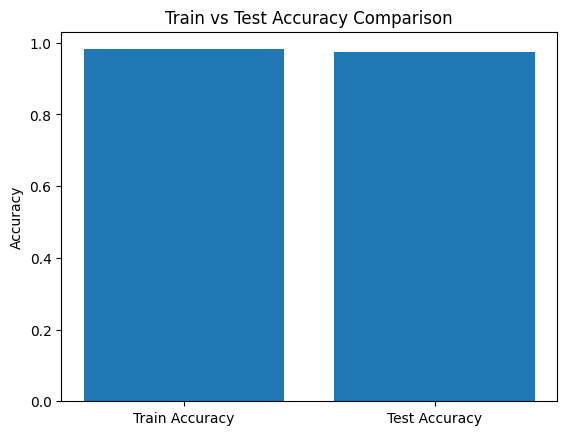

In [49]:
plt.figure()
plt.bar(["Train Accuracy", "Test Accuracy"], [accuracies[-1], test_accuracy])
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy Comparison")
plt.savefig("../outputs/train_vs_test_accuracy.png")
plt.show()


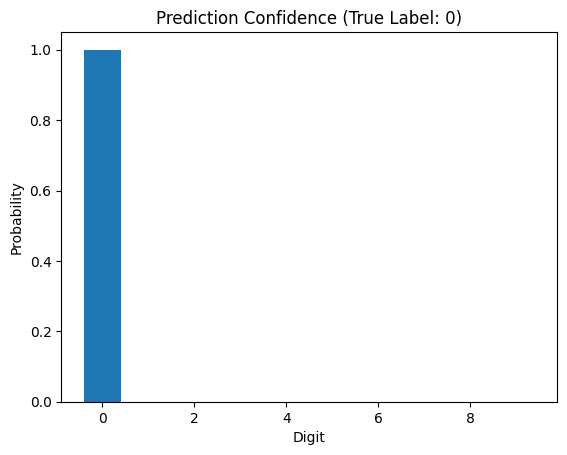

In [50]:
import numpy as np

sample_idx = np.random.randint(0, X_test.shape[0])
probs, _ = forward_propagation(X_test[sample_idx:sample_idx+1])

plt.figure()
plt.bar(range(10), probs.flatten())
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.title(f"Prediction Confidence (True Label: {int(y_test[sample_idx])})")
plt.savefig("../outputs/prediction_confidence.png")
plt.show()


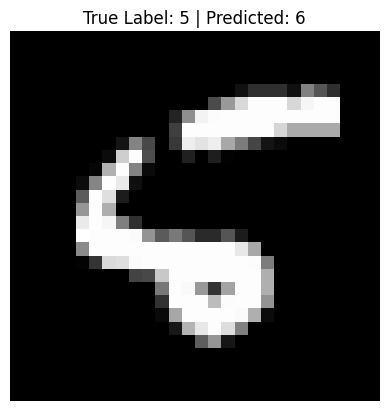

In [51]:
pred_labels = np.argmax(test_pred, axis=1)

for i in range(len(X_test)):
    if pred_labels[i] != y_test[i]:
        plt.figure()
        plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
        plt.title(f"True Label: {int(y_test[i])} | Predicted: {pred_labels[i]}")
        plt.axis("off")
        plt.savefig("../outputs/misclassification_example.png")
        plt.show()
        break
